In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report


In [8]:
#loading the data set

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep= ';')

In [65]:
#split the target data and data

x = df.drop(columns=['quality'])
y = df['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [66]:
#train the descion tree model

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [67]:
#Predicting the values

y_pred = dt.predict(x_test)

In [68]:
from colorama import Fore


In [69]:
#Printing the classification model
print(Fore.GREEN +"Classification Report of Decision Tree : ")
print(Fore.RED, classification_report(y_test, y_pred))

Classification Report of Decision Tree : 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.24      0.28      0.26        25
           5       0.66      0.64      0.65       291
           6       0.64      0.63      0.63       432
           7       0.61      0.59      0.60       192
           8       0.31      0.49      0.38        35
           9       0.00      0.00      0.00         0

    accuracy                           0.61       980
   macro avg       0.35      0.37      0.36       980
weighted avg       0.61      0.61      0.61       980



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
#Train the bagging classifier

bc =BaggingClassifier(base_estimator= DecisionTreeClassifier(), n_estimators=100,bootstrap=False,  random_state=42)
#fit the model
bc.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  n_estimators=100, random_state=42)

In [71]:
yb_pred = bc.predict(x_test)

In [72]:
print(Fore.BLUE +"Classification Reportmodel of Bagging Classifier : ")
print(Fore.YELLOW + classification_report(y_test, yb_pred))

Classification Reportmodel of Bagging Classifier : 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.25      0.32      0.28        25
           5       0.66      0.63      0.64       291
           6       0.64      0.64      0.64       432
           7       0.61      0.60      0.61       192
           8       0.36      0.46      0.41        35
           9       0.00      0.00      0.00         0

    accuracy                           0.61       980
   macro avg       0.36      0.38      0.37       980
weighted avg       0.61      0.61      0.61       980



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
#printing the scores
from sklearn.metrics import accuracy_score

print(Fore.RED , accuracy_score(y_test, y_pred))
print(Fore.GREEN , accuracy_score(y_test, yb_pred))

 0.6061224489795919
 0.6112244897959184


In [74]:
#printing the r2 scpore 


from sklearn.metrics import r2_score
print(Fore.RED + "R2 Score of Bagging : ")
print(Fore.GREEN, r2_score(y_test, yb_pred))

R2 Score of Bagging : 
 0.19365854445525976


In [77]:
#Evaluate Out of Bag Score for Bagging Classifier

bag_oob = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 100, oob_score = True, random_state = 42)
bag_oob.fit(x_train, y_train)
oob_score = bag_oob.oob_score_
print("Out - of Bag Score : ", oob_score)

Out - of Bag Score :  0.6707503828483921


In [78]:
oob_ypred = bag_oob.predict(x_test)

print(accuracy_score(y_test, oob_ypred))

0.6969387755102041


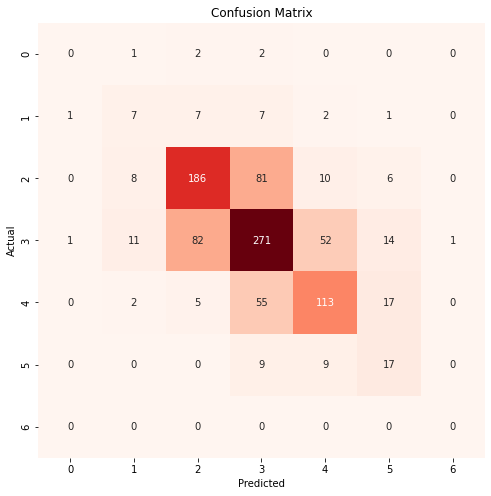

In [80]:
# ploting the 

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(cm, annot= True, fmt = 'd', cmap = plt.cm.Reds, cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

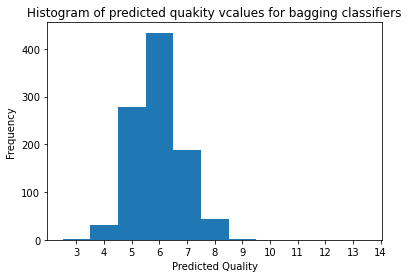

In [83]:
#plot the Histogram  of predicted quakity vcalues for bagging c;lassifiers

plt.hist(yb_pred, bins = range(3, 15), align = "left")
plt.xticks(range(3, 15))
plt.xlabel("Predicted Quality")
plt.ylabel("Frequency ")
plt.title("Histogram of predicted quakity vcalues for bagging classifiers")
plt.show()
